In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [13]:
right = pd.read_csv('40cm-try2-pilot_test/3-right_leg_tibi_20250429_191531_882.csv', skiprows=10, sep=",")
left = pd.read_csv('40cm-try2-pilot_test/2-left_leg_tibia_20250429_191531_880.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('40cm-try2-pilot_test/1-pelvis(s2)_20250429_191531_873.csv', skiprows=10, sep=",")

In [14]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [15]:
left['a_z'].describe()

count    455.000000
mean      -1.183228
std        6.945377
min      -56.572389
25%       -0.969941
50%       -0.521150
75%       -0.177776
max       47.857143
Name: a_z, dtype: float64

In [16]:
right['a_z'].describe()

count    455.000000
mean      -1.212921
std        6.010436
min      -70.346493
25%       -0.774045
50%       -0.319434
75%       -0.084238
max       51.866203
Name: a_z, dtype: float64

In [17]:
pelvis['a_z'].describe()

count    455.000000
mean       2.473738
std        3.928497
min      -12.124018
25%        1.163287
50%        1.394312
75%        1.628157
max       27.889842
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

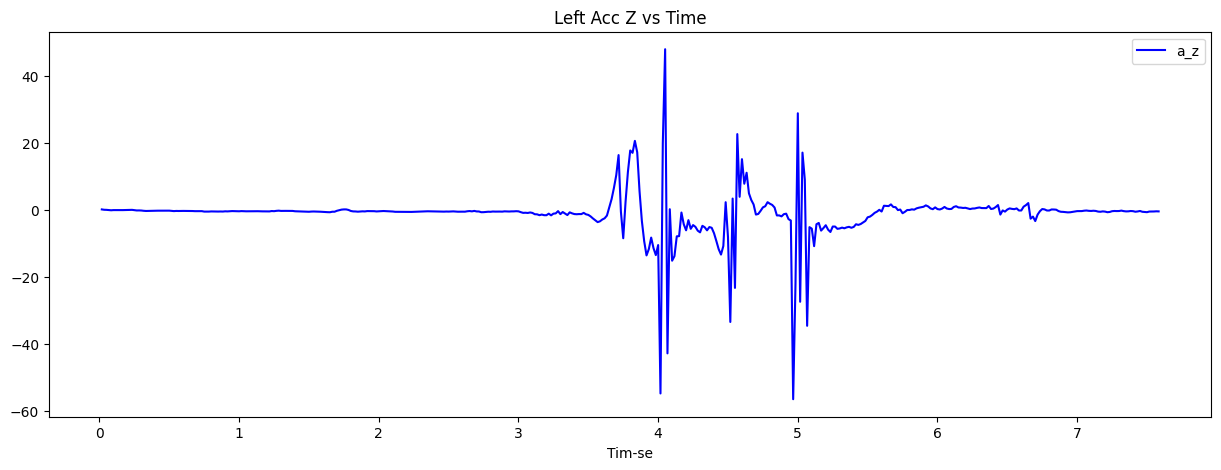

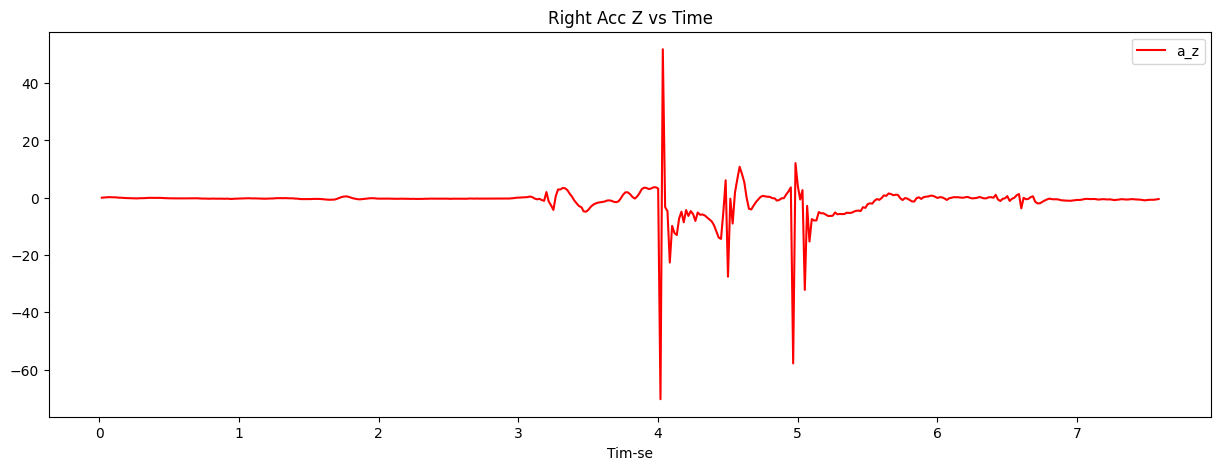

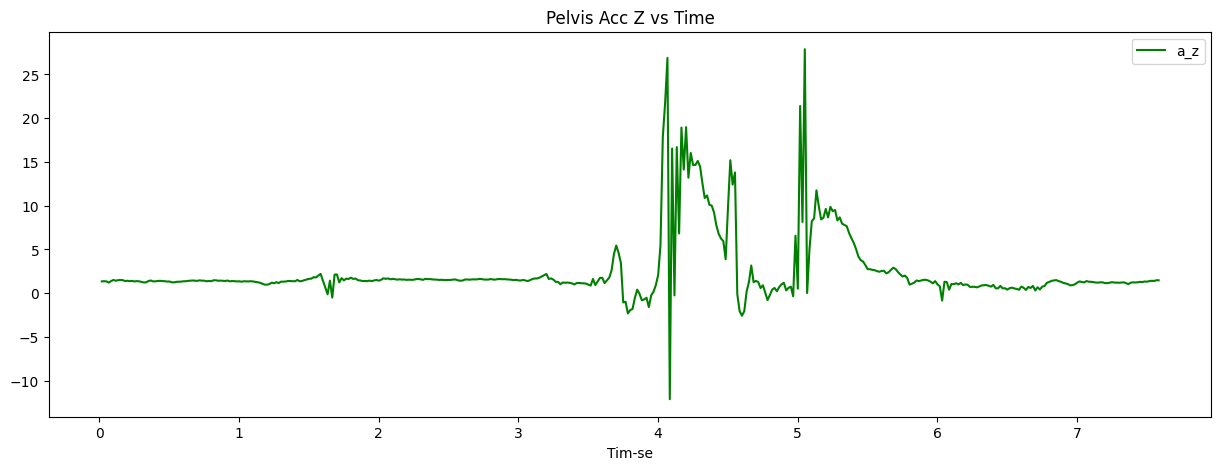

In [18]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')